In [1]:
from pickle import dump, load
from operator import itemgetter
from matplotlib import  pyplot as plt
import pandas as pd
from  scipy.spatial.distance import euclidean
import argparse


In [2]:
domains_per_protein=load(open("data/domains_per_protein.p",'rb'))
print ("Training Proteins Loaded-----\n")
proteins_per_domain=load(open("data/proteins_per_domain.p",'rb'))
print ("Training Domains are loaded\n")
#kidera_per_protein=load(open("graph data/kidera_per_protein.p"))
#=======================================================
# Read the ground truth EC labels associated with each
# protein in the pre-build graph.
#======================================================
training_EC=load(open("data/training_EC.p",'rb'))
print (" Training Labels are Loaded\n")

Training Proteins Loaded-----

Training Domains are loaded

 Training Labels are Loaded



In [3]:
print(len(domains_per_protein))

262564


In [4]:
#How many single domain protein
count=0
for p in domains_per_protein:
    if len(domains_per_protein[p])==1:
        count=count+1


In [5]:
print('The number of proteins with single InterPro signatures', count, count/len(domains_per_protein))

The number of proteins with single InterPro signatures 11175 0.04256105178166085


In [6]:
ec2dom={}
for p in training_EC:
    ec=training_EC[p][0]
    if ec in ec2dom:
        ec2dom[ec].append(domains_per_protein[p])
    else:
        ec2dom.update({ec:[domains_per_protein[p]]})



In [14]:
dom_com2ec={}
for p in training_EC:
    dom=tuple(sorted(domains_per_protein[p]))
    if dom in dom_com2ec:
        dom_com2ec[dom].add(training_EC[p][0])
    else:
        dom_com2ec.update({dom:set([training_EC[p][0]])})
    

In [15]:
t_dom=[]
for d in dom_com2ec:
    t_dom.append((d, len(dom_com2ec[d])))


In [16]:
len(t_dom)

13713

In [17]:
import matplotlib.pyplot as plt

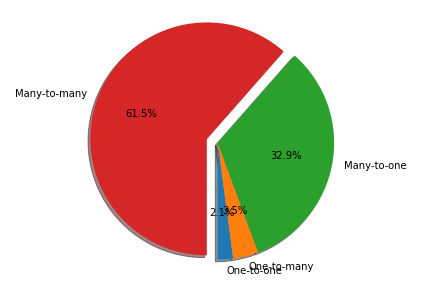

In [18]:
labels = ['One-to-one', 'One-to-many', 'Many-to-one', 'Many-to-many']
sizes = [291,484,4507,8431]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=-90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [21]:
ec2dom_com={}
for d in dom_com2ec:
    for ec in dom_com2ec[d]:
        if ec in ec2dom_com:
            ec2dom_com[ec].add(d)
        else:
            ec2dom_com.update({ec:set([d])})

In [22]:
len(ec2dom_com)

4602

In [23]:
ec2dom_com['3.7.1.-']

{('IPR000073', 'IPR029058'),
 ('IPR003785', 'IPR024087'),
 ('IPR010520', 'IPR029058')}

In [24]:
dom_com2ec[('IPR000073', 'IPR029058')]

{'1.11.1.-',
 '1.13.11.47',
 '1.13.11.48',
 '2.3.-.-',
 '2.3.1.-',
 '2.3.1.51',
 '2.4.1.-',
 '3.-.-.-',
 '3.1.-.-',
 '3.1.1.-',
 '3.1.1.1',
 '3.1.1.10',
 '3.1.1.13',
 '3.1.1.23',
 '3.1.1.3',
 '3.1.1.78',
 '3.1.1.81',
 '3.1.1.82',
 '3.1.1.88',
 '3.1.1.93',
 '3.1.1.95',
 '3.4.-.-',
 '3.4.14.-',
 '3.5.1.-',
 '3.5.1.106',
 '3.5.1.29',
 '3.7.1.-',
 '3.7.1.13',
 '3.7.1.17',
 '3.7.1.9',
 '4.1.2.10',
 '4.1.2.47'}

In [25]:
single_ec=[training_EC[x] for x in training_EC if len(training_EC[x])==1]

In [26]:
len(single_ec)

247683

In [27]:
single_ec[0:10]

[['2.7.1.40'],
 ['3.6.3.14'],
 ['2.8.1.-'],
 ['3.1.4.12'],
 ['1.14.14.-'],
 ['1.14.14.-'],
 ['1.14.14.-'],
 ['6.3.4.3'],
 ['4.1.1.48'],
 ['5.3.1.24']]

In [28]:
multi_ec=[x for x in training_EC if len(training_EC[x])>1]

In [29]:
len(multi_ec)

14881

In [30]:
multi_ec[0:10]

['A1D9Z6',
 'Q5E9H7',
 'A7ZDV3',
 'Q8F0E4',
 'Q4I5U9',
 'C3KWG3',
 'Q5H0S4',
 'Q0HA29',
 'Q9EP78',
 'Q8RBJ4']

In [31]:
single_dom=[x for x in domains_per_protein if len(domains_per_protein[x])==1]

In [32]:
len(single_dom)/len(domains_per_protein)

0.04256105178166085

In [48]:
(len(domains_per_protein)-len(single_dom))/len(domains_per_protein)

0.9574389482183392

In [80]:
incomp=[]
for x in training_EC:
    for ec in training_EC[x]:
        if '.-' in ec:
            incomp.append(x)
            break




In [82]:
len(incomp)

40385

In [83]:
import matplotlib.pyplot as plt
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('grid', linestyle="--", color='black')
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rcParams["font.family"] = 'Arial' 

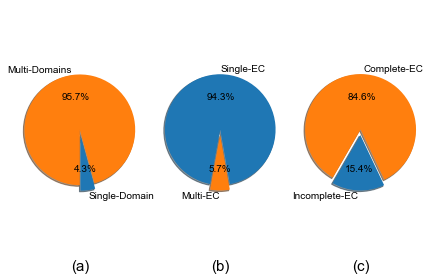

In [101]:
labels = ['Single-Domain','Multi-Domains']
sizes = [len(single_dom), len(domains_per_protein)-len(single_dom)]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0.1)  
fig1, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=-90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_xlabel('(a)')
ax1.axis('equal')

ax2.pie([len(single_ec), len(multi_ec)], explode=explode, labels=["Single-EC", "Multi-EC"], autopct='%1.1f%%',
        shadow=True, startangle=-80)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.set_xlabel('(b)')
ax2.axis('equal')


ax3.pie([len(incomp), len(domains_per_protein)-len(incomp)], explode=explode, labels=["Incomplete-EC", "Complete-EC"], autopct='%1.1f%%',
        shadow=True, startangle=-120)
# Equal aspect ratio ensures that pie is drawn as a circle
ax3.set_xlabel('(c)')
ax3.axis('equal')

plt.savefig("Data_stats.eps", format="eps", dpi=1000, pad_inches=0.1, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [33]:
len(single_ec)/len(domains_per_protein)

0.9433242942673025

In [34]:
len(multi_ec)/len(domains_per_protein)

0.056675705732697555

In [36]:
len(incomp)/len(domains_per_protein)

0.1538101186758276

In [37]:
# characteristics of training dataset
# having the ecs for each unique domain composition

def ec_split(ec,cl):
    ecc=ec.split('.')[:cl]
    return '.'.join(ecc)
def distrib(cl=1):
    
    dom_com2ec={}
    for p in training_EC:
        dom=tuple(sorted(domains_per_protein[p]))
        for ec in training_EC[p]:
            ecn=ec_split(ec,cl)
            if dom in dom_com2ec:

                dom_com2ec[dom].add(ecn)
            else:
                dom_com2ec.update({dom:set([ecn])})

    # Having the domain composition  for each  unique EC
    ec2dom_com={}
    for p in training_EC:
        dom=tuple(sorted(domains_per_protein[p]))
        for ec in training_EC[p]:
            ecn=ec_split(ec,cl)
            if ecn in ec2dom_com:
                ec2dom_com[ecn].add(dom)
            else:
                ec2dom_com.update({ecn:set([dom])})           
    return dom_com2ec, ec2dom_com
        
            
                

In [131]:
def stat(dom_com2ec, ec2dom_com):
    one2one=0
    one2many=0
    many2one=0
    many2many=0
    
    for dc in dom_com2ec:
        
        if len(dom_com2ec[dc])==1:
            ec=list(dom_com2ec[dc])[0]
            dc_ec=ec2dom_com[ec]
            if dc in dc_ec:
                one2one=one2one+1
                #print(dc, ec)
            else:
                many2many=many2many+1
        
            
    return one2one, many2many

In [132]:
dom_com2ec, ec2dom_com=distrib(1)
stat(dom_com2ec, ec2dom_com)


(12849, 0)

In [111]:
dom_com2ec[('IPR001697', 'IPR011037', 'IPR015793', 'IPR015795', 'IPR015806', 'IPR015813', 'IPR018209', 'IPR036918')]

{'2.7.1.40'}

In [112]:
ec2dom_com['2.7.1.40']

{('IPR001697',
  'IPR008279',
  'IPR011037',
  'IPR015793',
  'IPR015795',
  'IPR015806',
  'IPR015813',
  'IPR018209',
  'IPR036637',
  'IPR036918'),
 ('IPR001697',
  'IPR008279',
  'IPR011037',
  'IPR015793',
  'IPR015795',
  'IPR015806',
  'IPR015813',
  'IPR036637',
  'IPR036918'),
 ('IPR001697',
  'IPR008279',
  'IPR011037',
  'IPR015793',
  'IPR015795',
  'IPR015806',
  'IPR015813',
  'IPR036918'),
 ('IPR001697',
  'IPR011037',
  'IPR015793',
  'IPR015795',
  'IPR015806',
  'IPR015813',
  'IPR018209',
  'IPR036918'),
 ('IPR001697',
  'IPR011037',
  'IPR015793',
  'IPR015795',
  'IPR015806',
  'IPR015813',
  'IPR036918'),
 ('IPR001697', 'IPR011037', 'IPR015793', 'IPR015806', 'IPR015813'),
 ('IPR001697',
  'IPR011037',
  'IPR015793',
  'IPR015806',
  'IPR015813',
  'IPR018209',
  'IPR036918'),
 ('IPR001697',
  'IPR011037',
  'IPR015793',
  'IPR015806',
  'IPR015813',
  'IPR036918'),
 ('IPR001697', 'IPR015793', 'IPR015795', 'IPR015813', 'IPR036918'),
 ('IPR001697', 'IPR015793', 'IPR

In [40]:
len(ec2dom_com)

4876

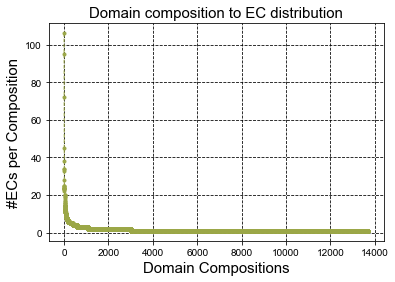

<Figure size 432x288 with 0 Axes>

In [96]:
d2=sorted(list(dom_com2ec.items()),key=lambda x:len(x[0]))
d3=[len(x[1]) for x in d2]
plt.plot(range(len(d3)), sorted(d3, reverse=True), linewidth=1, marker=".", markersize=6,linestyle="--", color='#9BA747')
plt.xlabel('Domain Compositions')
plt.ylabel("#ECs per Composition")

plt.title("Domain composition to EC distribution")
#plt.title("Cofactor benchmark")
#plt.legend(loc=4)
plt.grid(True)
plt.savefig("dom2ec_dist.eps", format="eps", dpi=1000, pad_inches=0.1, bbox_inches='tight')
plt.show()
plt.clf()
#plt.show()

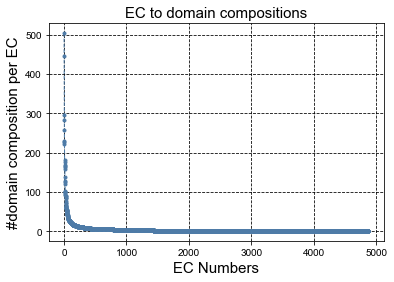

<Figure size 432x288 with 0 Axes>

In [97]:
d4=[len(ec2dom_com[x]) for x in ec2dom_com]
plt.plot(range(len(ec2dom_com)), sorted(d4, reverse=True), linewidth=1, marker=".", markersize=6,linestyle="--", color='#4E7BA7')
plt.xlabel('EC Numbers')
plt.ylabel("#domain composition per EC")

plt.title("EC to domain compositions")
#plt.title("Cofactor benchmark")
#plt.legend(loc=4)
plt.grid(True)
plt.savefig("ec2dom_dist.eps", format="eps", dpi=1000, pad_inches=0.1, bbox_inches='tight')
plt.show()
plt.clf()